# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('./DataFrame.csv')
df.head(2)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0


In [3]:
df = df[['Unnamed: 0', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau']]

In [4]:
df.head(2)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0


In [5]:
# Separando as variáveis explicativas da target

y = df.mau
X = df.drop('mau', axis=1)

In [6]:
# Separando entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [8]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

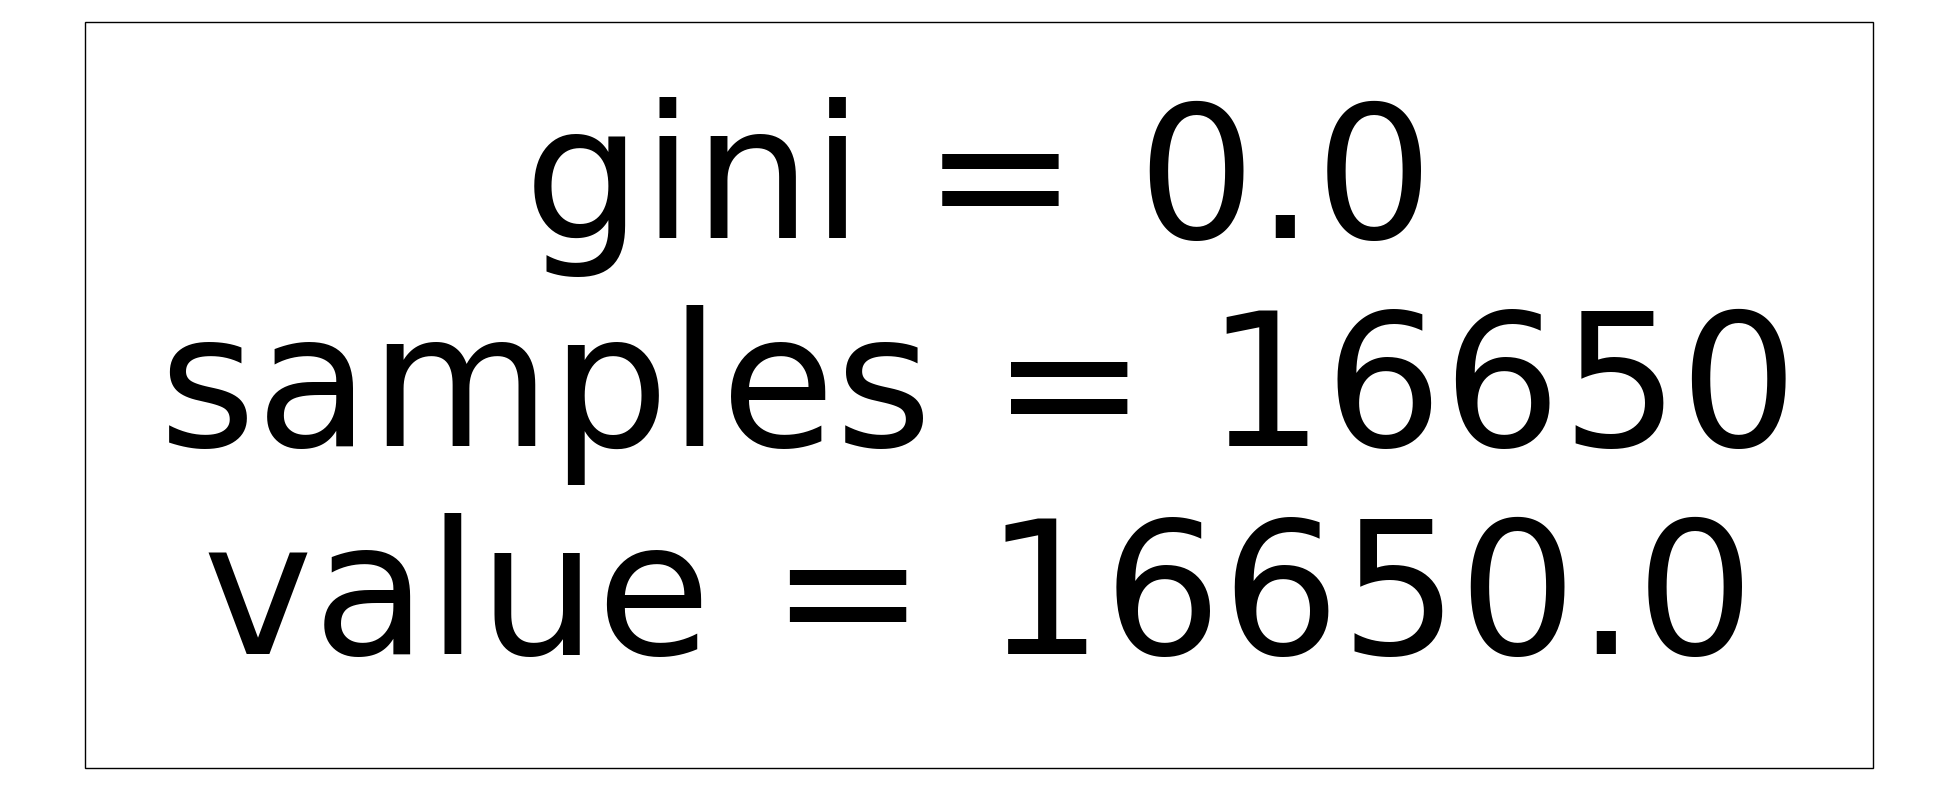

In [9]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['qtd_filhos', 'mau'],
          feature_names=X.columns);

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?